# Geometry #8
Visualize the influence of the ratio parameter

## Initialization

In [1]:
# Import pyKasso and other useful packages
import pykasso as pk
import numpy as np

In [2]:
# Create a pyKasso application
app = pk.pykasso()

# Declare the grid parameters
grid_parameters = {
    'x0' : 0,
    'y0' : 0,
    'z0' : 0,
    'nx' : 100,
    'ny' : 50,
    'nz' : 50,
    'dx' : 10,
    'dy' : 10,
    'dz' : 10
}

# Create a new project and declare its parameters
app.new_project(name='geometry_08', grid_parameters=grid_parameters)
app.visualizer.notebook = True
nx, ny, nz = app.project.grid.shape

In [3]:
# Declare the model parameters
model_parameters = {
    'sks' : {
        'seed' : 8888,
        'algorithm' : 'Riemann3',
        'mode' : 'A',
        'costs' : {}
    },
    'domain' : {},
    'outlets' : {
        'number'     : 1,
        'data'       : [[994, 250]],
        'subdomain'  : 'domain_bottom',
    },
    'inlets' : {
        'number'     : 1,
        'data'       : [[-5, 250]],
        'subdomain'  : 'domain_surface',
    },
}

## Ratio from 0.1 to 0.9

In [4]:
# Compute karst conduit networks
ratios = [i/10 for i in range(1,10)]
for ratio in ratios:
    model_parameters['sks']['costs']['ratio'] = ratio
    app.model.generate(model_parameters=model_parameters)

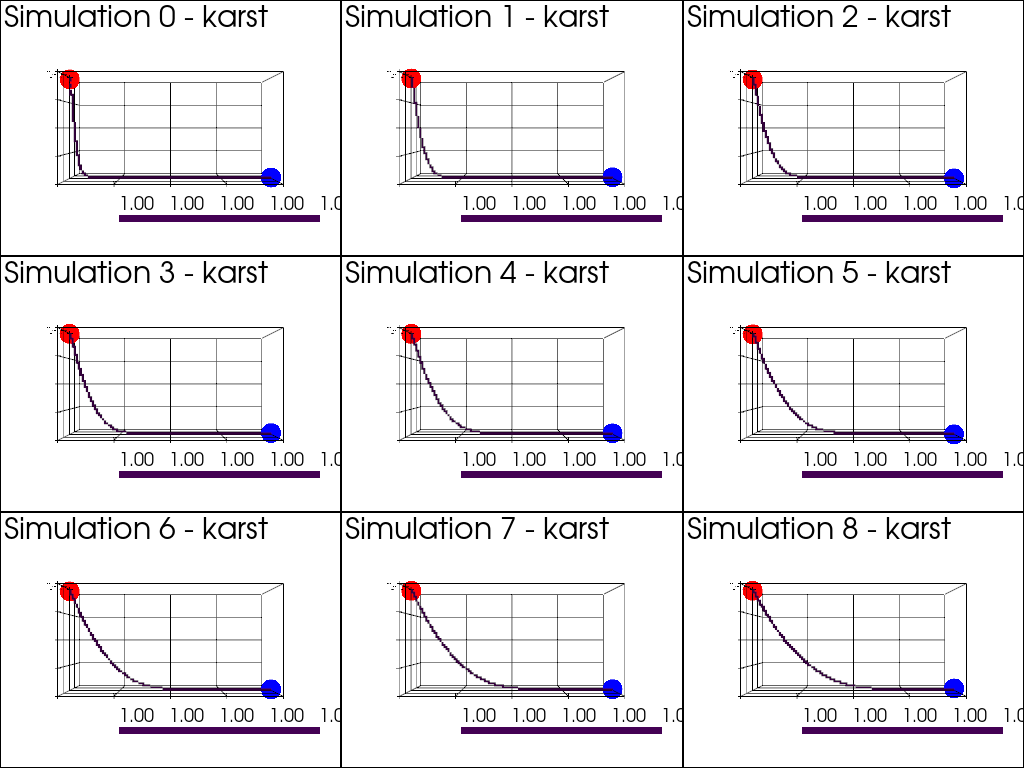

In [5]:
# Visualize the results
settings = {
    'mask_values': [0],
    'show_outline' : True,
    'inlets_options' : {},
    'outlets_options' : {},
}
last_simulations = app.project.get_last_simulations(9)
app.visualizer.pv_show(simulations=last_simulations,
                       features=['karst'],
                       settings=settings)

## Ratio as numpy array

In [6]:
# Change the model parameters
model_parameters = {
    'sks' : {
        'seed' : 8888,
        'algorithm' : 'Riemann3',
        'mode' : 'A',
        'costs' : {}
    },
    'domain' : {},
    'outlets' : {
        'number'     : 1,
        'data'       : [[500, 250]],
        'subdomain'  : 'domain_bottom',
    },
    'inlets' : {
        'number'     : 50,
        'importance' : [1,3,5],
        'subdomain'  : 'domain_surface',
    },
}

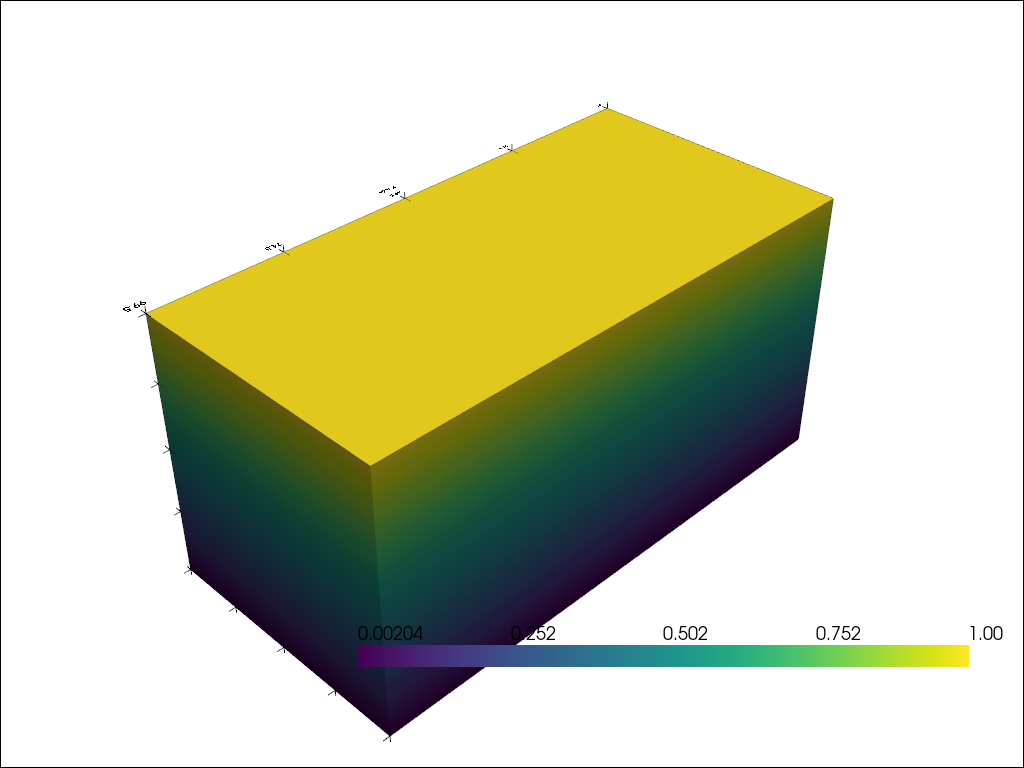

In [7]:
# Construct a ratio array depending of Z
X, Y, Z = app.project.grid.get_meshgrids()
ratio = (Z + 1) / Z.max()
app.visualizer.pv_plot_array(ratio, cpos=[1,1,1])

In [8]:
# Compute karst conduit networks
model_parameters['sks']['costs']['ratio'] = ratio
app.model.generate(model_parameters=model_parameters)

model_parameters['sks']['costs']['ratio'] = np.flip(ratio)
app.model.generate(model_parameters=model_parameters)

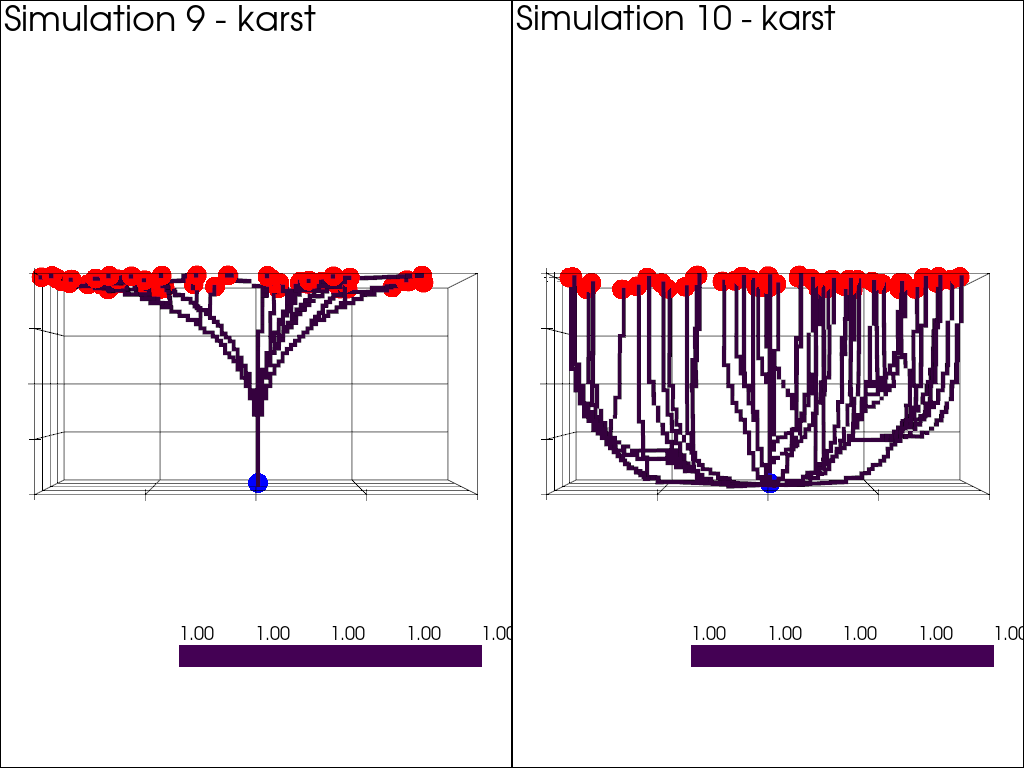

In [9]:
# Visualize the results
settings = {
    'mask_values': [0],
    'show_outline' : True,
    'inlets_options' : {},
    'outlets_options' : {},
}
last_simulations = app.project.get_last_simulations(2)
app.visualizer.pv_show(simulations=last_simulations,
                       features=['karst'],
                       settings=settings,
                       cpos='xz')